In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

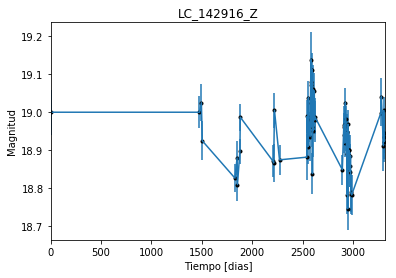

In [2]:
data = np.genfromtxt('LC_142916_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_142916_Z')
plt.savefig("LC_142916_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

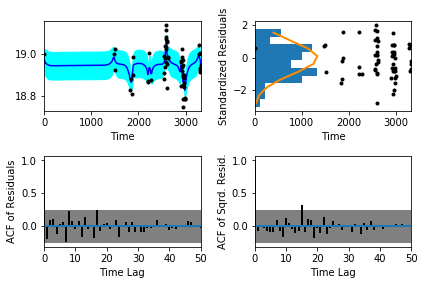

In [5]:
sample.assess_fit()

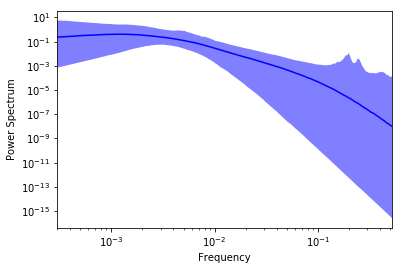

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

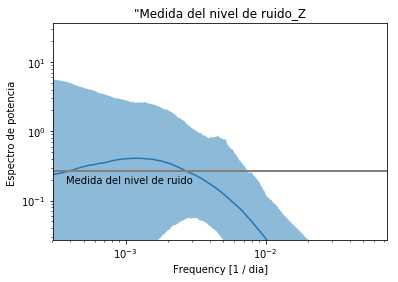

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_142916_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_142916_Z')

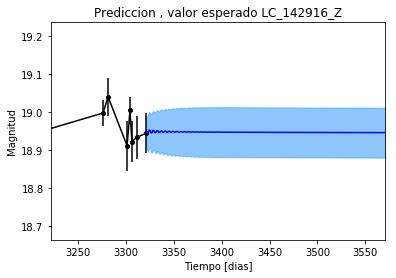

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_142916_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_142916_Z')

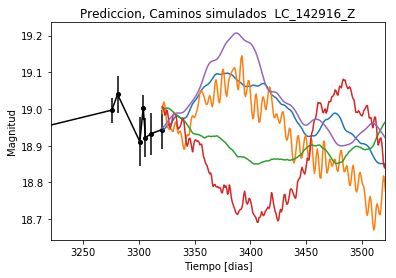

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_142916_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


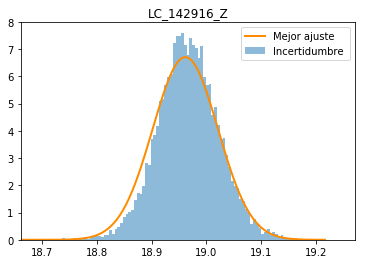

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_142916_Z')
plt.savefig("Mejor_ajuste_LC_142916_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_142916_Z')

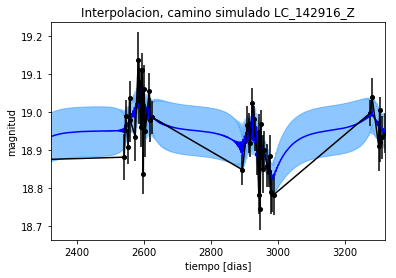

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_142916_Z')

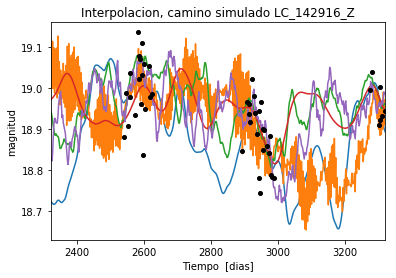

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 544.173666056
Median: 0.0120597287653
Standard deviation: 0.197556224686
68% credibility interval: [ 0.00136242  0.17715101]
95% credibility interval: [  4.03619904e-04   7.87386884e-01]
99% credibility interval: [  3.25731331e-04   9.87150157e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 460.203297161
Median: 0.00532224802873
Standard deviation: 0.101215944909
68% credibility interval: [ 0.00088151  0.04243977]
95% credibility interval: [ 0.00036298  0.3423303 ]
99% credibility interval: [  3.17451539e-04   7.09650199e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 655.609068623
Median: 0.0174041178519
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 971.019494241
Median: 100.51363346
Standard deviation: 1.80287523293
68% credibility interval: [  98.58460947  101.88629294]
95% credibility interval: [  96.13513639  103.40872653]
99% credibility interval: [  93.98926961  104.17977402]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 739.796436269
Median: 0.731127176434
Standard deviation: 2.32302298
68% credibility interval: [ 0.08273395  4.22027285]
95% credibility interval: [ 0.01832895  8.07128971]
99% credibility interval: [  0.01176228  10.54232334]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 723.876665218
Median: 1.5299682248
Standard deviation: 10.1004914671
68% credibility interval: [  0.05741872  13.89389432]
95% credibility interval: [  3.00810535e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19889.2809484
Median: 0.0168552639651
Standard deviation: 4.2824688616e+76
68% credibility interval: [  1.35324318e-33   3.36062951e+37]
95% credibility interval: [  1.52643706e-61   8.45642761e+62]
99% credibility interval: [  2.45751640e-72   2.94287909e+75]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2285.27925172
Median: 18.9318040963
Standard deviation: 0.0278814418791
68% credibility interval: [ 18.90823359  18.95436045]
95% credibility interval: [ 18.87712025  18.98635033]
99% credibility interval: [ 18.84380387  19.03335178]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 219.374482986
Median: 0.0788731976092
Standard deviation: 0.269186397336
68% credibility interval: [ 0.          0.49986601]
95% credibility interval: [ 0.          0.89695712]
99% credibility interval: [ 0.          1.01689522]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 219.374482986
Median: 0.0788731976092
Standard deviation: 0.269186397336
68% credibility interval: [ 0.          0.49986601]
95% credibility interval: [ 0.          0.89695712]
99% credibility interval: [ 0.          1.01689522]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 477.748241079
Median: 0.0
Standard deviation: 0.00187596059197
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 971.019494241
Median: 100.51363346
Standard deviation: 1.80287523293
68% credibility interval: [  98.58460947  101.88629294]
95% credibility interval: [  96.13513639  103.40872653]
99% credibility interval: [  93.98926961  104.17977402]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2610.73329209
Median: 0.00504509661386
Standard deviation: 0.0051097399854
68% credibility interval: [ 0.0030426   0.00913385]
95% credibility interval: [ 0.00176675  0.01935756]
99% credibility interval: [ 0.0012504   0.03101151]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 715.066466847
Median: 1.29158043963
Standard deviation: 0.216506660327
68% credibility interval: [ 1.08650549  1.51816079]
95% credibility interval: [ 0.91085664  1.76112254]
99% credibility interval: [ 0.80231717  1.89092819]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 460.670515384
Median: 1.90488964454e-05
Standard deviation: 0.206973443142
68% credibility interval: [  5.20135724e-41   1.67519957e-02]
95% credibility interval: [  1.18451006e-66   4.77408998e-01]
99% credibility interval: [  5.58363942e-78   1.41082232e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 544.173666056
Median: (-0.0757735105869+0j)
Standard deviation: 2.09796092223
68% credibility interval: [-1.11307260+0.j         -0.00856032-0.04764923j]
95% credibility interval: [ -4.94729770e+00+0.j          -2.53601865e-03-0.10962205j]
99% credibility interval: [ -6.20244736e+00+0.j         -2.04663031e-03-0.0370173j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 460.203297161
Median: (-0.0334406706153+4.66544093287j)
Standard deviation: 1.80695915154
68% credibility interval: [-0.26665693+2.96906914j -0.00553871+0.97795198j]
95% credibility interval: [-2.15092469+0.j -0.00228068+0.j]
99% credibility interval: [ -4.45886370e+00+6.10646576j  -1.99460685e-03+0.07488836j]
Posterior summary for parameter ar_roots  el